# Linear Gaussian State Space System 

# Literature and/or Audio

https://www.youtube.com/playlist?list=PLyQSjcv8LwAGvIw2KNX6IelIIJ5SQDYZZ

# A. Time-Invariant LGSSS

$$
\\
$$

\begin{align*}
& ME: \quad \underbrace{y_t}_{p \times 1}|\mathcal{F}_{t-1} =  \underbrace{a}_{p \times 1} + \underbrace{B}_{p\times m} \, \times \underbrace{\alpha_t}_{m \times 1}  + \underbrace{\epsilon_t}_{p \times 1}, \quad \epsilon_t|\mathcal{F}_{t-1} \sim N(0, \underbrace{H}_{p \times p}) \\  \\
& SE: \quad \underbrace{\alpha_{t}}_{m \times 1}|\mathcal{F}_{t-1} = \underbrace{c}_{m \times 1}\, + \,\underbrace{\Phi}_{m \times m} \, \times \, \alpha_{t-1}  + \, \underbrace{\eta_{t}}_{m\times 1}, \quad \eta_{t}|\mathcal{F}_{t-1} \sim N(0,\underbrace{Q}_{m \times m}) 
\end{align*}

# B. Kalman Filter Estimates for $\alpha_t$

**Initialize the Kalman Filter with Expert Knowledge $[a_0, P_0]$**

$$
E[\alpha_1|\mathcal{F}_0] \equiv a_0 \quad \text{and} \quad Var(\alpha_1|\mathcal{F}_0) \equiv P_0 
$$

**Run** through the training set, assuming you have measurments for $t\in \{1,2,...,T\}$ as follows: 


for $t=1, ..., T$
\begin{align*} 
&\{\\
& \text{Learning Rate}: \quad K_t := Var(\alpha_t|\mathcal{F}_{t-1}) \times B' \; \times [ B \times Var(\alpha_t|\mathcal{F}_{t-1}) \times B'\, + \, H ]^{-1} \\\\
& \text{Prediction Error}: \quad v_t := y_t - E[y_t|\mathcal{F}_{t-1}]\\\\
& \text{Posterior}: E[\alpha_t|\mathcal{F}_{t}] = E[\alpha_t|\mathcal{F}_{t-1}] + K_t \, \times \, v_t, \quad \text{and} \quad Var(\alpha_t|\mathcal{F}_{t}) = Var(\alpha_t|\mathcal{F}_{t-1}) \times (I - K_t \, B) \\\\
& \text{Prior:}: E[\alpha_{t+1}|\mathcal{F}_{t}] = c+\Phi  \times E[\alpha_t|\mathcal{F}_{t}] , \quad \text{and} \quad Var(\alpha_{t+1}|\mathcal{F}_{t}) = \Phi \times  Var(\alpha_{t}|\mathcal{F}_{t})\times \Phi' + \, Q.\\
&\}
\end{align*}

# C. (Expected) Likelihood

**We aim to find the joint EXPECTED likelihood function** for the model parameters $\theta$ with
$$
\\
$$

$$
\{ B, a, H, \Phi, c, Q \} \in \theta,
$$

conditional on observing 

$$
\{y_t\}_{t \in [1,...,T]}.
$$

$$
\\
$$
The **joint EXPECTED log-likelihood funtion is**  

\begin{align*}
& \ln L_T(\theta) = \sum_{t=1}^T \, \ln prob(y_t(\theta) | \mathcal{F}_{t-1}) \quad \quad \text{with} \quad prob(y_1(\theta)|\mathcal{F}_0) \equiv prob(y_1(\theta))
\end{align*}

with:
    
$$
\\
$$

\begin{align*}
& prob(y_t(\theta)|\mathcal{F}_{t-1}) \sim N \left( E[y_t(\theta)|\mathcal{F}_{t-1}],  \quad Var(y_t(\theta)|\mathcal{F}_{t-1}) \right) \\\\
\end{align*}

**Notice: KF estimates for $\alpha_t$ enter through the expectation and variance of the last equation**, i.e.
    
$$
\\
$$

$$
E[y_t(\theta)|\mathcal{F}_{t-1}] \overbrace{=}^{LGSSM} a+B\times E[\alpha_t|\mathcal{F}_{t-1}] \qquad \text{and} \qquad Var(y_t(\theta)|\mathcal{F}_{t-1})  \overbrace{=}^{LGSSM} B\times Var(\alpha_t|\mathcal{F}_{t-1}) \times B' \, + \, H 
$$

$$
\\
$$

**All in one:**
    
$$
\\
$$

\begin{align*}
\ln L_T(\theta) &= -\frac{Tp}{2} \ln (2\pi) \\ \\
& -\frac{1}{2} \sum_{t=1}^T \,  \ln |Var(y_t(\theta)|\mathcal{F}_{t-1})|  \\\\ 
%
& -\frac{1}{2} \sum_{t=1}^T \, [y_t -E[y_t(\theta)|\mathcal{F}_{t-1}]  ]' \, \times \, \left(Var(y_t(\theta)|\mathcal{F}_{t-1})\right)^{-1} \,\times \, [y_t - E[y_t(\theta)|\mathcal{F}_{t-1}] ] 
\end{align*}

# D. Visualization of Kalman Filter Recursions with Python

In [1]:
#packages

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
export = True
figsize=(15,15)

## Application: Filter Expected Returns out of Realized Returns


$$
\\
$$
 
\begin{equation*}
ME: \qquad      r_{t} = x_{t} + \sigma_r  \delta_{t}, \; \delta_t \sim N(0,1)
\end{equation*}
$$
\\
$$

\begin{equation*}
SE: \qquad      x_{t} = \phi  x_{t-1} + \sigma_x  \epsilon_{t}, \; \epsilon_{t} \sim N(0,1)
\end{equation*}

$$
\\
$$

**Parametrization:** We work with KNOWN parameters:
        
$$
\phi \in (-1,1)
$$

$$
\sigma_x \in \mathcal{R}_+
$$

$$
\sigma_r = \in \mathcal{R}_+
$$

$$
E[\delta_t e_t] =:\rho \in [-1,1]
$$

$$
\\
$$

**Signal-to-Noise-Ratio (SNR)** KF identifies $x$ only precisely if data is informative (i.e. best learning if $SNR \rightarrow 1$)

$$
SNR := \frac{\sigma^2_x}{\sigma^2_x + \sigma^2_r} \; \in (0,1)
$$

## D.1 Simulate $r_t$ and $x_t$ for $t \in [1,...,T]$ 

**Don't miss out to play around with the Signal-to-Noise-Ratio**

In [2]:
#seed
np.random.seed(123)

#T
T =  100 # time steps #1000

#parameters
phi = 0.94
sigma_x = 0.04 # 0.04    #0.1 
sigma_r = 0.4 #0.24 #0.4
rho = -0.8

# Translate (r_t,x_t) into a MV-Gauss density N(mu,Sigma)
mu    = [0,0]
Sigma = [[sigma_r**2, rho * sigma_r * sigma_x], [rho * sigma_r * sigma_x, sigma_x**2]]


# T times N(mu,Sigma)
innov = np.random.multivariate_normal(mu, Sigma, T)

# \{r_t,x_t\}_{t \in 1,...,T}
r = np.empty(T)
x = np.empty(T)

r[0] = innov[0,0] #starting value, here: r_0 = innov_r(0)
x[0] = innov[0,1] #starting value, here: x_0 = innov_x(0)

for t in range(1,T):
    x[t] = phi * x[t-1] + innov[t,1]
    r[t] = x[t]         + innov[t,0]

## D.2 Plot $r_t$ and $x_t$ for $t \in [1,...,T]$

Text(0.5, 1.0, 'Realized and Expected Returns')

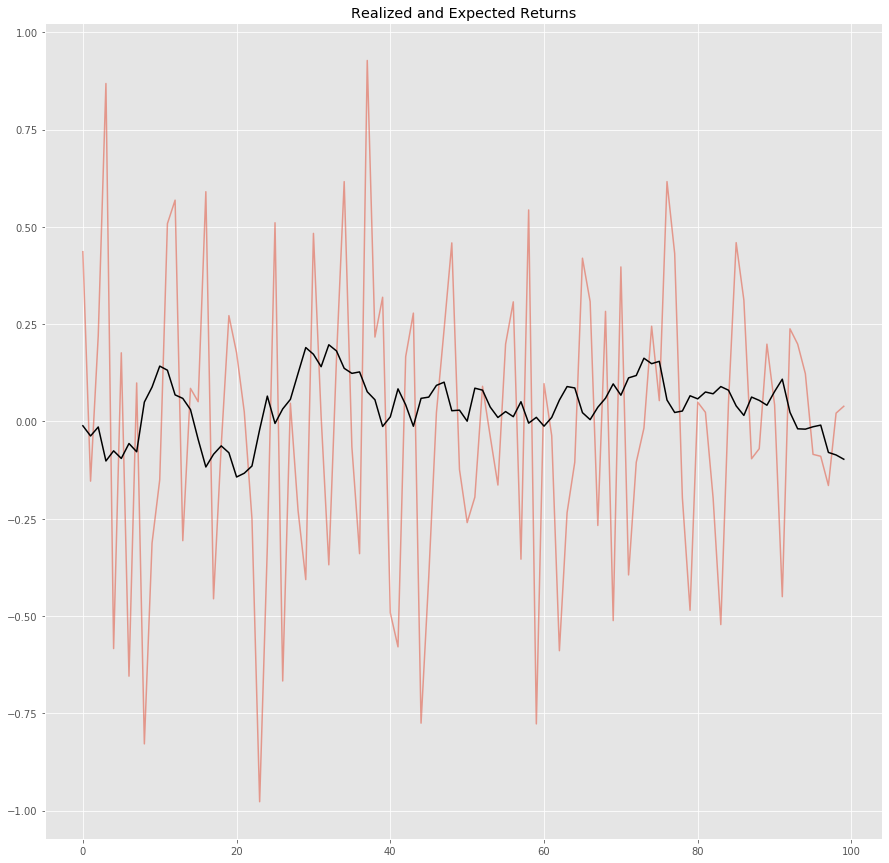

In [3]:
#visualize how x hides wihtin r
plt.figure(1,figsize=(15,15))
plt.plot(range(0,T), r, alpha=0.5)
plt.plot(range(0,T), x, 'black')
plt.title('Realized and Expected Returns')
 

## D.3 Start the KF Routine to back out $x_t$ form observing $r_t$

In [4]:
#Assume parameters are known
y   = [np.matrix(t) for t in list(r)]
a   = np.matrix(0)
B   = np.matrix(1)
H   = sigma_r**2
c   = np.matrix(0)
Phi = np.matrix(phi)
Q   = sigma_x**2

In [5]:
#call Helper Function with KF-Recursions
from ipynb.fs.defs.Helper_KalmanFilterLGSSM import KalmanFilter_Recursions_1dim 

KF_r_ = KalmanFilter_Recursions_1dim(y, a, B, H, c, Phi, Q)

In [6]:
#get posterior and prior state estimates
at, Pt, atm1, Ptm1 = KF_r_.runRecursions()

## D.4 Visualize Mean of Prior and Posterior Probability Density Function of Latent State

Text(0.5, 1.0, 'simulated r and x, vs. mean of prior and posterior on x')

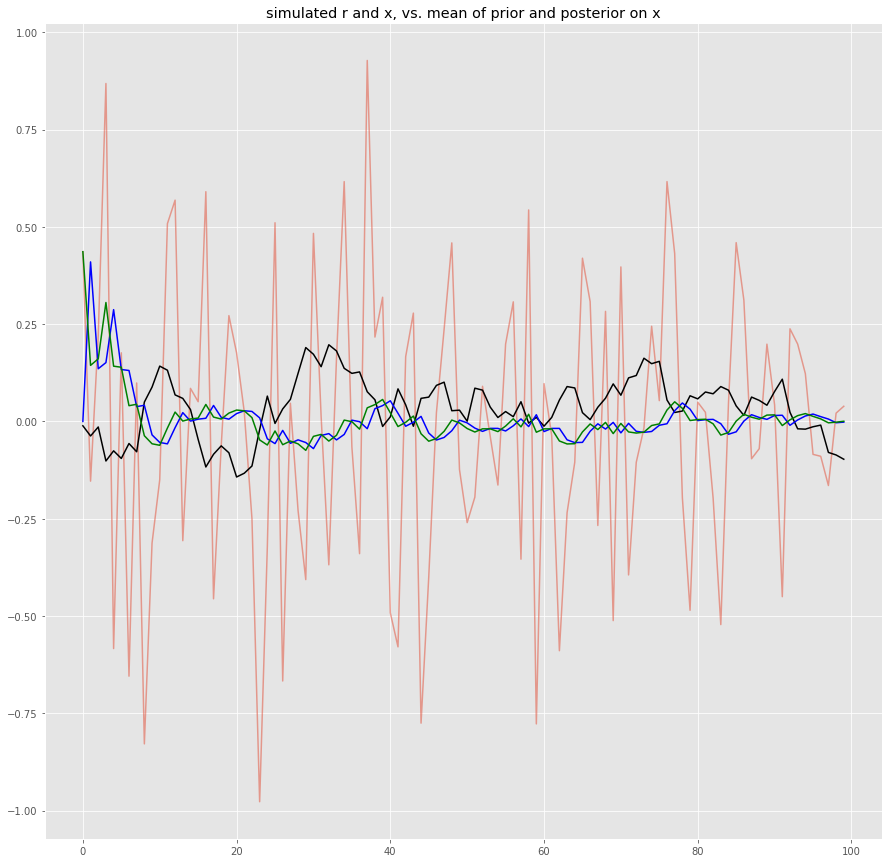

In [7]:
#visualize r vs x vs prior and posterior estimates 

plt.figure(2,figsize=(15,15))
plt.plot(range(0,T), r, alpha=0.5)
plt.plot(range(0,T), x, 'black')
plt.plot(range(0,T), atm1[:-1], 'blue')
plt.plot(range(0,T), at, 'green')
plt.title('simulated r and x, vs. mean of prior and posterior on x')

**Observation**

- Filter estimates are as useful and trashy as are the estimates for 

$$
\sigma_x \quad \text{} \quad \sigma_r.
$$
This is also a form of Garbage In, Garbage Out problem. Reason: Kalman recursions are deterministic functions of the Signal-to-Noise-Ratio.

$$
\\
$$

- The larger the former, the higher the Signal-to-Noise-Ratio, the more will $x$ follow the observed movements of $r$.

$$
\\
$$

- It is not on us to set $\sigma_x$ and $\sigma_r$. These are data characteristics. Our job is to find precise estimates.

$$
\\
$$

- Engineering has the advantage that $\sigma_r$ is sensor noise and that firms like Bosch etc build highest precision sensors. Also, $\sigma_x$ in Engineering are things like wind speed, accelaration of an object, etc. Said differently, Engineering has built over hundreds of years precise sensors and theories. Finance is not there yet. Financial Data Science as a young discipline offers opportunities and high chance of being fooled by randomness

$$
\\
$$

- Financial Data Scientists: need to be theory and data savvy to find good estimates for the data SNR.